# Random Forest x IRIS 

In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt

### Importer le dataset IRIS 

In [2]:
# import some data to play with
iris = datasets.load_iris()

### Faite un dataFrame et renommer les colonnes 

In [9]:
df = pd.DataFrame(iris.data, columns=["sepal_length", "sepal_width", "petal_length", "petal_width"])
df.head()

sepal_length  sepal_width  petal_length  petal_width
0           5.1          3.5           1.4          0.2
1           4.9          3.0           1.4          0.2
2           4.7          3.2           1.3          0.2
3           4.6          3.1           1.5          0.2
4           5.0          3.6           1.4          0.2

### Définir les variables features et la target & effectuer un split 

In [32]:
X = df
y = pd.DataFrame(iris.target)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

### Entrainer le classifieur 

In [33]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=0)
clf.fit(X_train, y_train)

/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

### Afficher l'accuracy de votre classifieurs 

In [84]:
from sklearn.metrics import accuracy_score
y_pred = clf.predict(X_test)
y_true = y_test
accuracy_score(y_true, y_pred)

0.9666666666666667

### Analyser votre classifieur, que voyez vous ? 

### Afficher les features importances

In [85]:
feature_importance = pd.Series(clf.feature_importances_,index=iris.feature_names).sort_values(ascending = False)
feature_importance
    

petal width (cm)     0.551770
petal length (cm)    0.279410
sepal length (cm)    0.135903
sepal width (cm)     0.032918
dtype: float64

### Afficher graphiquement les features importances  

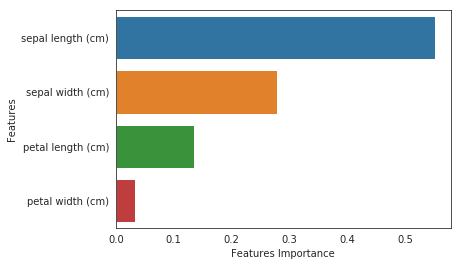

In [86]:
with sns.axes_style("white"):
    sns.barplot(x=feature_importance, y= iris.feature_names)
    plt.ylabel('Features')
    plt.xlabel('Features Importance')